In [1]:
import pandas as pd
data = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")

In [2]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
data = data.iloc[:,1:]
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [4]:
data.isnull().sum()

Text    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


# Data Cleaning

In [6]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [7]:
data['Text'] = data.Text.apply(clean)
data.Text
data_df = pd.DataFrame(data)
data_df

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is


In [8]:
#Word frequency
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq

the               486
to                400
is                355
a                 355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [9]:
#removing stopwords
from nltk.corpus import stopwords
stop = pd.read_csv('stop.txt')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

the               486
to                400
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
rt                127
that              127
but               126
ppathole          123
dtype: int64

In [11]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [12]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aber,1,0.000052
1,able,6,0.000315
2,abo,1,0.000052
3,aboard,1,0.000052
4,abort,3,0.000157
5,about,39,0.002046
6,above,5,0.000262
7,absence,1,0.000052
8,absolute,1,0.000052
9,absolutely,15,0.000787


In [13]:
#TFIDF - Term frequency inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [14]:
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zogfotpik,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram

In [15]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [16]:
top2_words = get_top_n2_words(data["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,71
1,will be,51
2,of the,47
3,this is,36
4,in the,36


[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'will be'),
 Text(2, 0, 'of the'),
 Text(3, 0, 'this is'),
 Text(4, 0, 'in the'),
 Text(5, 0, 'to the'),
 Text(6, 0, 'to be'),
 Text(7, 0, 'we re'),
 Text(8, 0, 'is the'),
 Text(9, 0, 'should be'),
 Text(10, 0, 'on the'),
 Text(11, 0, 'it will'),
 Text(12, 0, 'would be'),
 Text(13, 0, 'lot of'),
 Text(14, 0, 'spacex falcon'),
 Text(15, 0, 'erdayastronaut spacex'),
 Text(16, 0, 'for the'),
 Text(17, 0, 'we will'),
 Text(18, 0, 'the spacestation'),
 Text(19, 0, 'is not')]

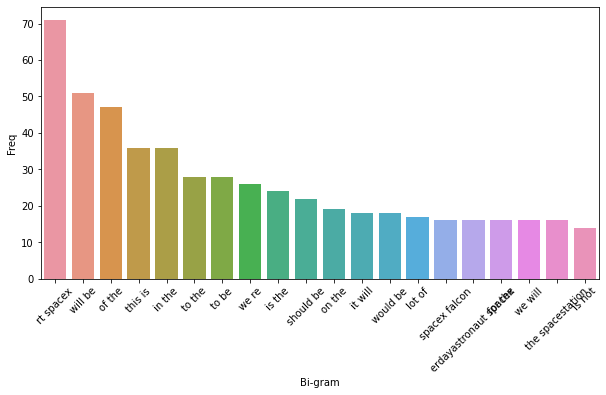

In [17]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [18]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [19]:
top3_words = get_top_n3_words(data["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [20]:
top3_df

,Tri-gram,Freq
0,rt spacex falcon,16
1,falcon first stage,9
2,to the spacestation,9
3,it will be,8
4,spacex falcon first,8
...,...,...
195,rt spacex separation,2
196,spacex separation confirmed,2
197,separation confirmed dragon,2
198,confirmed dragon performing,2


[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'to the spacestation'),
 Text(3, 0, 'it will be'),
 Text(4, 0, 'spacex falcon first'),
 Text(5, 0, 'thesheetztweetz waemd spacex'),
 Text(6, 0, 'of course still'),
 Text(7, 0, 'course still love'),
 Text(8, 0, 'still love you'),
 Text(9, 0, 'one of the'),
 Text(10, 0, 'ppathole thesheetztweetz waemd'),
 Text(11, 0, 'waemd spacex spacexstarlink'),
 Text(12, 0, 'first stage has'),
 Text(13, 0, 'stage has landed'),
 Text(14, 0, 'has landed on'),
 Text(15, 0, 'rt spacex liftoff'),
 Text(16, 0, 'that would be'),
 Text(17, 0, 'spacex spacexstarlink wanationalguard'),
 Text(18, 0, 'astrobehnken and astrodoug'),
 Text(19, 0, 'spacex felixschlang marcushousegame')]

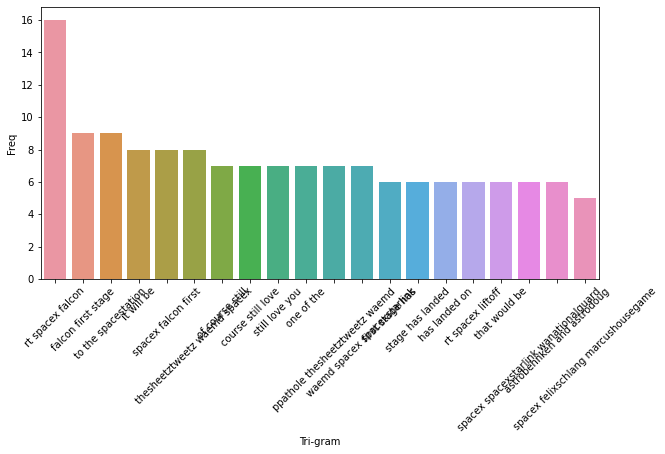

In [21]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# WordCloud

In [22]:
string_Total = " ".join(data["Text"])

In [23]:
from wordcloud import wordcloud

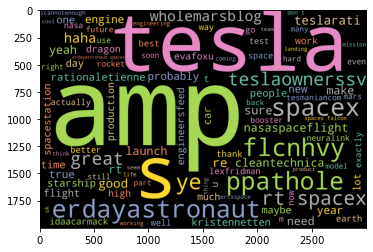

In [24]:
#wordcloud for entire corpus
from wordcloud import WordCloud
from wordcloud import STOPWORDS as stp
stp.add('will')
wordcloud_stw = WordCloud(background_color= 'black',width = 3000, 
                          height = 2000,
                          max_words=100,
                          colormap='Set2',
                          stopwords=stp).generate(string_Total)
plt.imshow(wordcloud_stw)

In [25]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [26]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [27]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [28]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [29]:
import spacy

In [30]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(data: str = None) -> float:
    sent_score = 0
    if data:
        sentence = nlp(data)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [31]:
# test that it works
calculate_sentiment(data = 'very sad')

-2

In [32]:
data_df['sentiment_value'] = data_df['Text'].apply(calculate_sentiment)
data_df

,Text,sentiment_value
0,im an alien,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,0
2,joerogan spotify great interview,3
3,doge is underestimated,-1
4,teslacn congratulations tesla china for amazin...,6
...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,-3
1995,ppathole make sure to read ur terms amp condit...,1
1996,teslagong ppathole samwise gamgee,0
1997,ppathole altho dumb and dumber is,-6


In [33]:
# how many words are in the Text?
data_df['word_count'] = data_df['Text'].str.split().apply(len)
data_df['word_count'].head(10)

0     3
1    13
2     4
3     3
4    17
5     6
6    14
7     4
8    10
9     8
Name: word_count, dtype: int64

In [34]:
data_df.sort_values(by='sentiment_value').tail(10)

,Text,sentiment_value,word_count
824,futurejurvetson ppathole super appreciate your...,7,15
1786,flcnhvy yourfavgas ajtourville i really want t...,8,19
514,spacestation spacex wow station looks amazing,8,6
1966,nichegamer i didnt mind was awesome mass effe...,8,13
1172,thanks tesla team for great work on deliveries...,10,20
1357,great trip to germany support from government ...,10,12
468,picotjohn cyberpunkgame its good to great gam...,10,18
458,teslaownerssv it will get absurdly good tesla ...,10,17
1304,one way or another excitement guaranteed suppo...,11,17
1388,gerberkawasaki wow i super loved astronomy but...,12,19


In [35]:
# Sentiment score of the whole review
data_df['sentiment_value'].describe()

count    1999.000000
mean        0.729365
std         1.817855
min        -7.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [36]:
# Sentiment score of the negative reviews
data_df[data_df['sentiment_value']<0].head(10)

,Text,sentiment_value,word_count
3,doge is underestimated,-1,3
6,frodo was the underdoge all thought he would f...,-2,14
15,joshmanmode he definitely has issues but the s...,-2,11
20,freewalletorg any crypto wallet that wont giv...,-1,17
21,freewalletorg your app sucks,-3,4
25,rationaletienne adamklotz starlink is staggeri...,-1,14
26,rationaletienne adamklotz spacex needs to pass...,-2,18
32,sruhle everyone at tesla receives stock my com...,-2,23
42,univercurious extremely misleading image as do...,-5,16
81,ajtourville erdayastronaut spacex yes but engi...,-1,18


In [37]:
# Sentiment score of the positive reviews
data_df[data_df['sentiment_value']>0].head(10)

,Text,sentiment_value,word_count
2,joerogan spotify great interview,3,4
4,teslacn congratulations tesla china for amazin...,6,17
5,happy new year of the ox,3,6
7,owensparks flcnhvy haha thanks,5,4
9,the most entertaining outcome is the most likely,2,8
11,just agree to do clubhouse with kanyewest,1,7
16,freewalletorg thanks for fixing,2,4
17,freewalletorg please unlock my account,1,5
19,this is true power haha,3,5
23,ajtourville yes,1,2


In [38]:
data_df[data_df['sentiment_value']>10].head(10)

,Text,sentiment_value,word_count
1304,one way or another excitement guaranteed suppo...,11,17
1388,gerberkawasaki wow i super loved astronomy but...,12,19


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

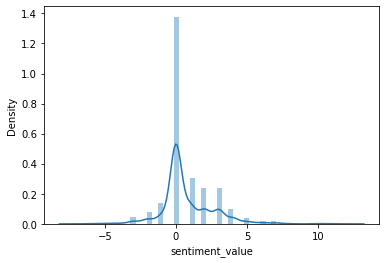

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data_df['sentiment_value'])

In [40]:
data_df

,Text,sentiment_value,word_count
0,im an alien,0,3
1,idaacarmack ray tracing on cyberpunk with hdr ...,0,13
2,joerogan spotify great interview,3,4
3,doge is underestimated,-1,3
4,teslacn congratulations tesla china for amazin...,6,17
...,...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,-3,22
1995,ppathole make sure to read ur terms amp condit...,1,12
1996,teslagong ppathole samwise gamgee,0,4
1997,ppathole altho dumb and dumber is,-6,6


In [52]:
result = []
for value in data_df["sentiment_value"]:
    if value < 0 :
        result.append("Negative")
    elif value == 0 :
        result.append("Neutral")
    else :
        result.append("Positive")
    
data_df["sentiment_value"] = result
print(data_df)

                                                   Text sentiment_value  \
0                                          im an alien         Neutral   
1     idaacarmack ray tracing on cyberpunk with hdr ...         Neutral   
2                      joerogan spotify great interview        Positive   
3                                doge is underestimated        Negative   
4     teslacn congratulations tesla china for amazin...        Positive   
...                                                 ...             ...   
1994  flcnhvy true it sounds so surreal but the nega...        Negative   
1995  ppathole make sure to read ur terms amp condit...        Positive   
1996                  teslagong ppathole samwise gamgee         Neutral   
1997                  ppathole altho dumb and dumber is        Negative   
1998                             progress update august        Positive   

      word_count  
0              3  
1             13  
2              4  
3              3  
4   

In [53]:
data_df

,Text,sentiment_value,word_count
0,im an alien,Neutral,3
1,idaacarmack ray tracing on cyberpunk with hdr ...,Neutral,13
2,joerogan spotify great interview,Positive,4
3,doge is underestimated,Negative,3
4,teslacn congratulations tesla china for amazin...,Positive,17
...,...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,Negative,22
1995,ppathole make sure to read ur terms amp condit...,Positive,12
1996,teslagong ppathole samwise gamgee,Neutral,4
1997,ppathole altho dumb and dumber is,Negative,6
